In [211]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

In [212]:
df=pd.read_csv('purchase data.csv')

In [213]:
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [214]:
df.shape

(58693, 24)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58693 non-null  int64  
 1   Day                58693 non-null  int64  
 2   Incidence          58693 non-null  int64  
 3   Brand              58693 non-null  int64  
 4   Quantity           58693 non-null  int64  
 5   Last_Inc_Brand     58693 non-null  int64  
 6   Last_Inc_Quantity  58693 non-null  int64  
 7   Price_1            58693 non-null  float64
 8   Price_2            58693 non-null  float64
 9   Price_3            58693 non-null  float64
 10  Price_4            58693 non-null  float64
 11  Price_5            58693 non-null  float64
 12  Promotion_1        58693 non-null  int64  
 13  Promotion_2        58693 non-null  int64  
 14  Promotion_3        58693 non-null  int64  
 15  Promotion_4        58693 non-null  int64  
 16  Promotion_5        586

In [216]:
df.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [217]:
df.duplicated().sum()

0

In [218]:
df['Incidence'].value_counts()

Incidence
0    44055
1    14638
Name: count, dtype: int64

In [219]:
df['Brand'].value_counts()

Brand
0    44055
5     4978
2     4542
4     2927
1     1350
3      841
Name: count, dtype: int64

In [220]:
condition = (df["Incidence"] == 0) & (df["Quantity"] != 0)
violations = df[condition]

print(f"Number of violations: {len(violations)}")


Number of violations: 0


All the quantities which are zeros have incidence=0 which make sense as the incidence=0 means the customer doesn't buy anything

In [221]:
no_purchase = df[df["Incidence"] == 0]
no_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [222]:
no_purchase['Brand'].value_counts()

Brand
0    44055
Name: count, dtype: int64

In [223]:
zero_qty_but_bought = df[(df["Incidence"] == 1) & (df["Quantity"] == 0)]

print(f"Number of rows where Incidence=1 but Quantity=0: {len(zero_qty_but_bought)}")

if len(zero_qty_but_bought) > 0:
    display(zero_qty_but_bought.head())


Number of rows where Incidence=1 but Quantity=0: 0


In [224]:

brand0_with_purchase = df[(df["Brand"] == 0) & (df["Incidence"] == 1)]

print(f"Number of rows where Brand=0 but Incidence=1: {len(brand0_with_purchase)}")


if len(brand0_with_purchase) > 0:
    display(brand0_with_purchase.head())


Number of rows where Brand=0 but Incidence=1: 0


**Data Understanding**

After seeing that there are alot of quantities=0 ,I noticed that the quantities that are assigned to zero are with Incidence=0 means the customer didn't buy any thing and for the other features in this case the brand is always zero and I noticed that the brand=0 doesn't appear in any other records it only appears at incidence=0,qauntity=0 which can make us assume that the brand=0 is placeholder when the customer doesn;t buy anything.

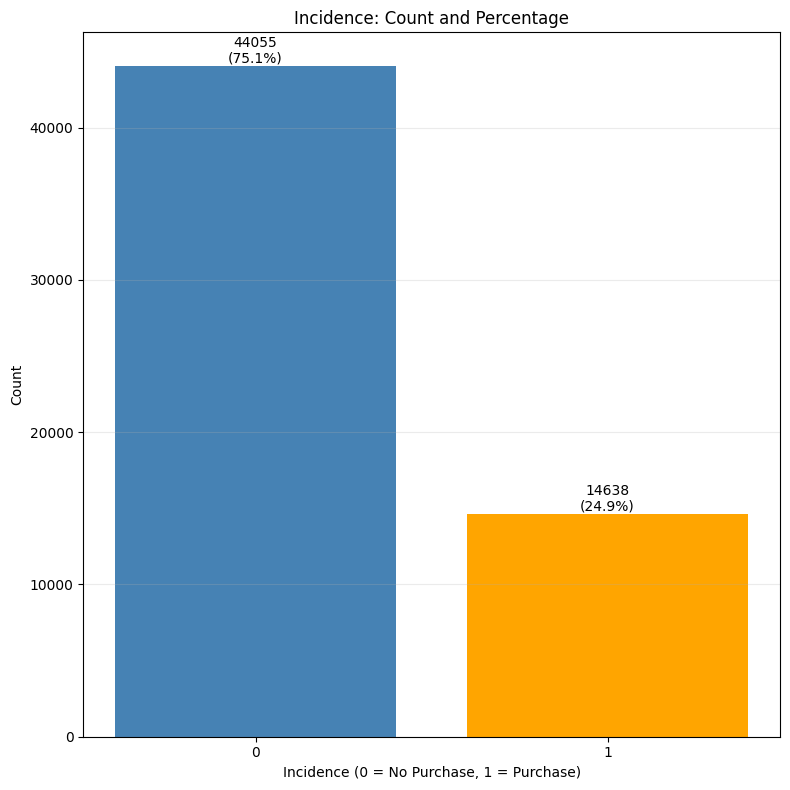

In [225]:
# Value counts and percentages
inc_counts = df["Incidence"].value_counts().reindex([0,1], fill_value=0)
inc_percent = (inc_counts / inc_counts.sum() * 100).round(2)


plt.figure(figsize=(8,8))
bars = plt.bar(inc_counts.index.astype(str), inc_counts.values, color=['steelblue','orange'])
plt.title("Incidence: Count and Percentage")
plt.xlabel("Incidence (0 = No Purchase, 1 = Purchase)")
plt.ylabel("Count")


for b, pct in zip(bars, inc_percent):
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h,
             f"{int(h)}\n({pct:.1f}%)", 
             ha="center", va="bottom", fontsize=10)

plt.grid(axis="y", alpha=0.25)
plt.tight_layout()
plt.show()

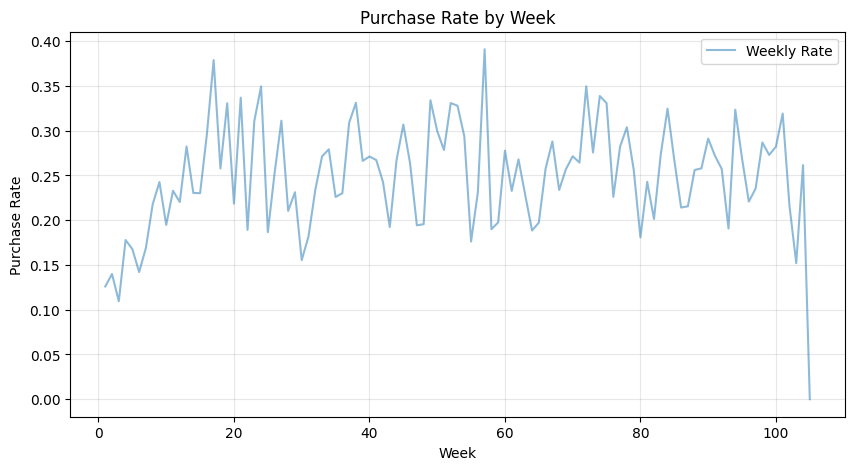

In [226]:
df["Week"] = (df["Day"] // 7) + 1  
purchase_rate_by_week = df.groupby("Week")["Incidence"].mean()

plt.figure(figsize=(10,5))
plt.plot(purchase_rate_by_week.index, purchase_rate_by_week.values, label="Weekly Rate", alpha=0.5)

plt.title("Purchase Rate by Week")
plt.xlabel("Week")
plt.ylabel("Purchase Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

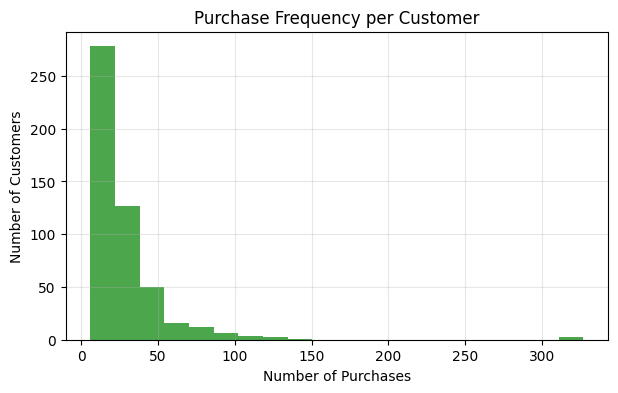

In [227]:
purchase_freq_per_customer = df[df["Incidence"]==1].groupby("ID")["Incidence"].count()

plt.figure(figsize=(7,4))
plt.hist(purchase_freq_per_customer, bins=20, color='green', alpha=0.7)
plt.title("Purchase Frequency per Customer")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.grid(alpha=0.3)
plt.show()

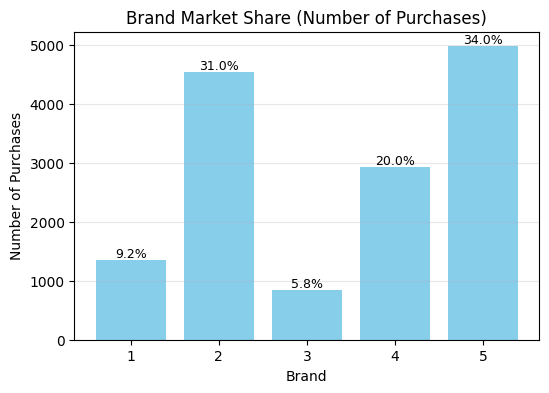

In [228]:
purchase_data = df[df["Incidence"] == 1]

brand_counts = purchase_data["Brand"].value_counts().sort_index()
brand_percent = (brand_counts / brand_counts.sum() * 100).round(2)

plt.figure(figsize=(6,4))
bars = plt.bar(brand_counts.index, brand_counts.values, color='skyblue')
plt.title("Brand Market Share (Number of Purchases)")
plt.xlabel("Brand")
plt.ylabel("Number of Purchases")
for b, pct in zip(bars, brand_percent):
    plt.text(b.get_x() + b.get_width()/2, b.get_height(), f"{pct:.1f}%", 
             ha="center", va="bottom", fontsize=9)
plt.grid(axis='y', alpha=0.3)
plt.show()

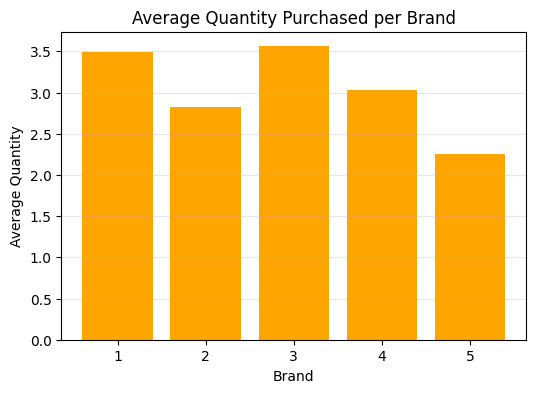

In [229]:
avg_qty_per_brand = purchase_data.groupby("Brand")["Quantity"].mean()

plt.figure(figsize=(6,4))
plt.bar(avg_qty_per_brand.index, avg_qty_per_brand.values, color='orange')
plt.title("Average Quantity Purchased per Brand")
plt.xlabel("Brand")
plt.ylabel("Average Quantity")
plt.grid(axis='y', alpha=0.3)
plt.show()

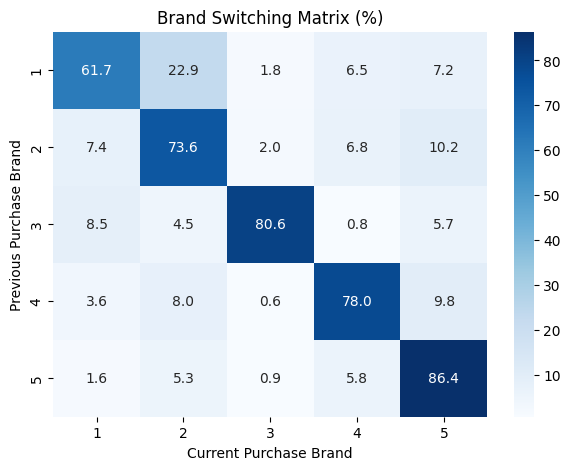

Average Brand Loyalty: 76.05%


In [230]:
switch_data = purchase_data[purchase_data["Last_Inc_Brand"] != 0]


switch_matrix = pd.crosstab(switch_data["Last_Inc_Brand"], switch_data["Brand"], normalize='index') * 100


plt.figure(figsize=(7,5))
sns.heatmap(switch_matrix, annot=True, fmt=".1f", cmap="Blues")
plt.title("Brand Switching Matrix (%)")
plt.xlabel("Current Purchase Brand")
plt.ylabel("Previous Purchase Brand")
plt.show()


loyalty = switch_matrix.values.diagonal().mean()
print(f"Average Brand Loyalty: {loyalty:.2f}%")

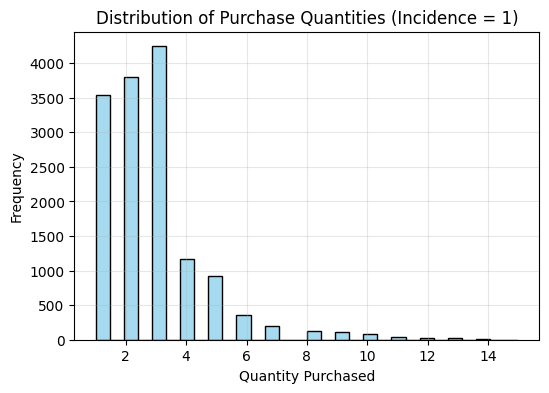

In [231]:
purchase_data_buy = purchase_data[purchase_data["Incidence"] == 1]


plt.figure(figsize=(6,4))
sns.histplot(purchase_data_buy["Quantity"], bins=30, color="skyblue")
plt.title("Distribution of Purchase Quantities (Incidence = 1)")
plt.xlabel("Quantity Purchased")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

<Figure size 700x500 with 0 Axes>

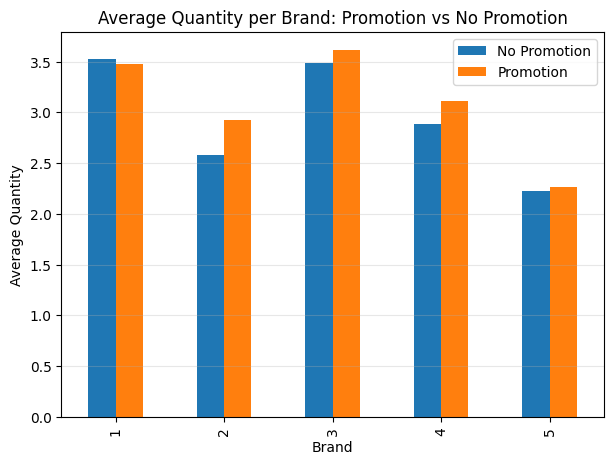

In [232]:
promotion_cols = [col for col in purchase_data_buy.columns if "Promotion" in col]
purchase_data_buy["Any_Promotion"] = (purchase_data_buy[promotion_cols].sum(axis=1) > 0).astype(int)
avg_qty_promo_brand = purchase_data_buy.groupby(["Brand","Any_Promotion"])["Quantity"].mean().unstack()

plt.figure(figsize=(7,5))
avg_qty_promo_brand.plot(kind='bar', figsize=(7,5))
plt.title("Average Quantity per Brand: Promotion vs No Promotion")
plt.xlabel("Brand")
plt.ylabel("Average Quantity")
plt.legend(["No Promotion", "Promotion"])
plt.grid(axis='y', alpha=0.3)
plt.show()


C:\Users\FH\AppData\Local\Temp\ipykernel_8844\688726091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_data["Any_Promotion"] = purchase_data[promo_cols].max(axis=1)
C:\Users\FH\AppData\Local\Temp\ipykernel_8844\688726091.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_qty_promo.index, y=avg_qty_promo.values, ax=axes[0], palette="Blues")
C:\Users\FH\AppData\Local\Temp\ipykernel_8844\688726091.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effe

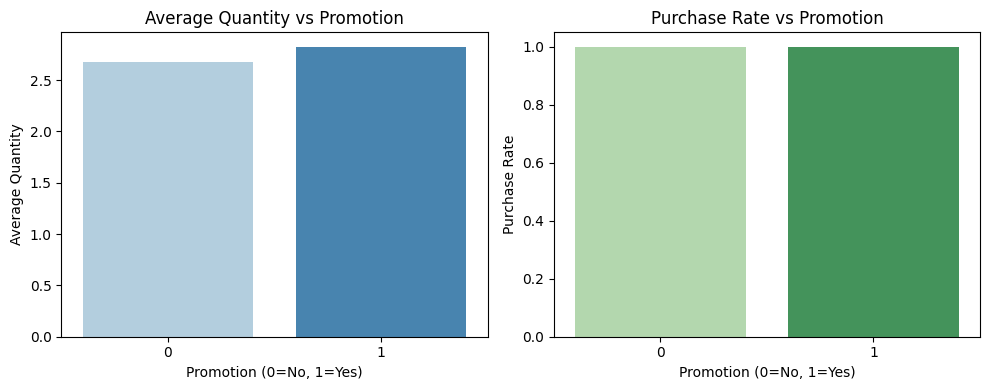

In [233]:
promo_cols = [col for col in purchase_data.columns if "Promotion" in col]
purchase_data["Any_Promotion"] = purchase_data[promo_cols].max(axis=1)


avg_qty_promo = purchase_data[purchase_data["Incidence"]==1].groupby("Any_Promotion")["Quantity"].mean()
purchase_rate_promo = purchase_data.groupby("Any_Promotion")["Incidence"].mean()

fig, axes = plt.subplots(1, 2, figsize=(10,4))


sns.barplot(x=avg_qty_promo.index, y=avg_qty_promo.values, ax=axes[0], palette="Blues")
axes[0].set_title("Average Quantity vs Promotion")
axes[0].set_xlabel("Promotion (0=No, 1=Yes)")
axes[0].set_ylabel("Average Quantity")


sns.barplot(x=purchase_rate_promo.index, y=purchase_rate_promo.values, ax=axes[1], palette="Greens")
axes[1].set_title("Purchase Rate vs Promotion")
axes[1].set_xlabel("Promotion (0=No, 1=Yes)")
axes[1].set_ylabel("Purchase Rate")

plt.tight_layout()
plt.show()

Average Price per Brand (sorted):
Brand
3    1.396587
2    1.389890
4    1.389508
5    1.386336
1    1.341844
Name: Price_1, dtype: float64


C:\Users\FH\AppData\Local\Temp\ipykernel_8844\877761680.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values, palette="magma")


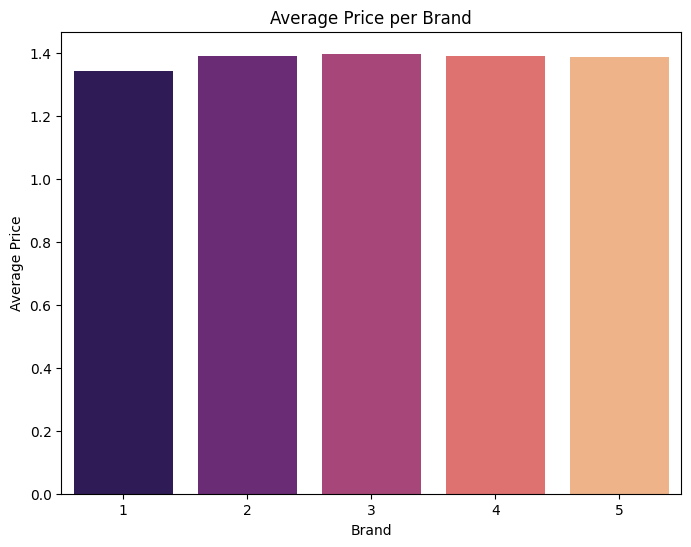

In [234]:
avg_price_brand = purchase_data.groupby("Brand")["Price_1"].mean().sort_values(ascending=False)


print("Average Price per Brand (sorted):")
print(avg_price_brand)


plt.figure(figsize=(8,6))
sns.barplot(x=avg_price_brand.index, y=avg_price_brand.values, palette="magma")
plt.title("Average Price per Brand")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.show()


In [235]:
promo_cols = [c for c in purchase_data.columns if c.lower().startswith("promotion_")]
if not promo_cols:
    raise ValueError("No Promotion_* columns found.")

purchase_data = purchase_data.copy()
purchase_data["Any_Promotion"] = (purchase_data[promo_cols].max(axis=1) > 0).astype(int)


per_promo_rates = purchase_data[promo_cols].mean().sort_values(ascending=False) * 100
print("Promotion usage per column (% of rows with promo=1):")
print(per_promo_rates.round(2))

Promotion usage per column (% of rows with promo=1):
Promotion_1    37.25
Promotion_2    34.96
Promotion_4    12.81
Promotion_5     4.54
Promotion_3     4.39
dtype: float64


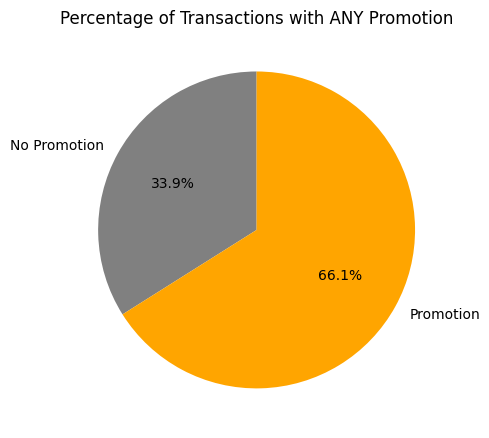

In [236]:
promo_counts = purchase_data["Any_Promotion"].value_counts().reindex([0,1], fill_value=0)

plt.figure(figsize=(5,5))
plt.pie(
    promo_counts.values,
    labels=["No Promotion", "Promotion"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["grey","orange"]
)
plt.title("Percentage of Transactions with ANY Promotion")
plt.tight_layout()
plt.show()

C:\Users\FH\AppData\Local\Temp\ipykernel_8844\1913534082.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(elasticities.keys()), y=list(elasticities.values()), palette="coolwarm")


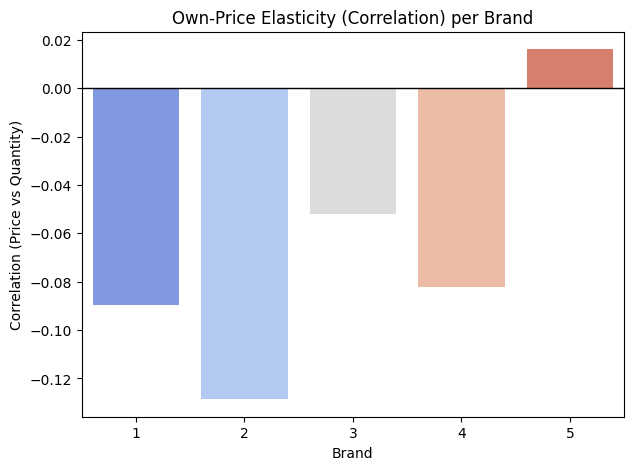

Own-Price Elasticity (Correlation):
Brand 1: -0.090
Brand 2: -0.129
Brand 3: -0.052
Brand 4: -0.082
Brand 5: 0.016


In [237]:
elasticities = {}

for b in sorted(purchase_data["Brand"].unique()):
    price_col = f"Price_{b}"  
    brand_data = purchase_data[(purchase_data["Brand"] == b) & (purchase_data["Incidence"] == 1)]
    
    if brand_data[price_col].std() > 0 and brand_data["Quantity"].std() > 0:
        corr = np.corrcoef(brand_data[price_col], brand_data["Quantity"])[0,1]
        elasticities[b] = corr


plt.figure(figsize=(7,5))
sns.barplot(x=list(elasticities.keys()), y=list(elasticities.values()), palette="coolwarm")
plt.title("Own-Price Elasticity (Correlation) per Brand")
plt.xlabel("Brand")
plt.ylabel("Correlation (Price vs Quantity)")
plt.axhline(0, color="black", linewidth=1)
plt.show()

print("Own-Price Elasticity (Correlation):")
for b, e in elasticities.items():
    print(f"Brand {b}: {e:.3f}")


C:\Users\FH\AppData\Local\Temp\ipykernel_8844\2024283558.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pr.index.astype(str), y=pr.values, ax=ax, palette="Blues")
C:\Users\FH\AppData\Local\Temp\ipykernel_8844\2024283558.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pr.index.astype(str), y=pr.values, ax=ax, palette="Blues")
C:\Users\FH\AppData\Local\Temp\ipykernel_8844\2024283558.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pr.index.astype(str), y=pr.values, ax=ax, palette="Blues")


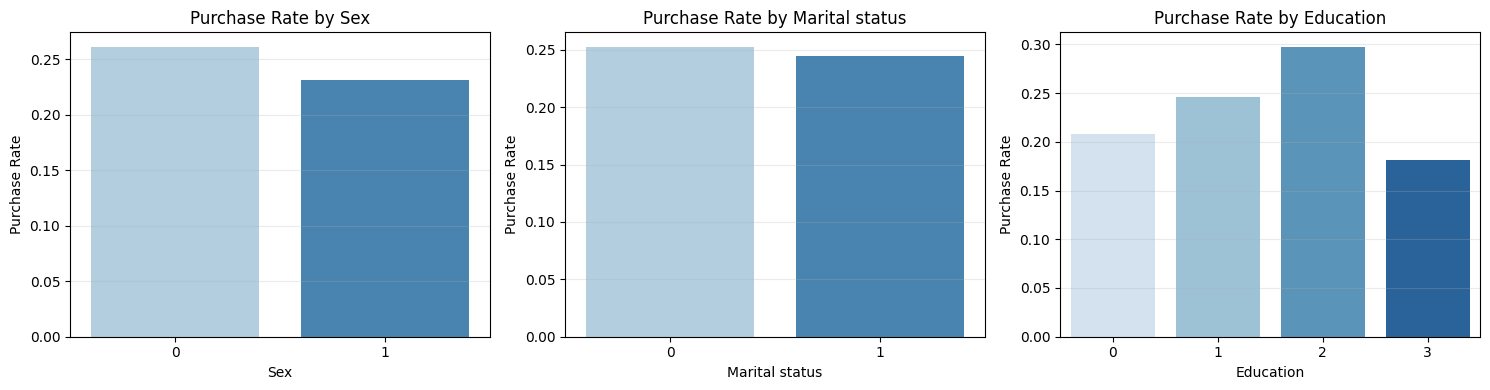

C:\Users\FH\AppData\Local\Temp\ipykernel_8844\2024283558.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pr.index.astype(str), y=pr.values, ax=ax, palette="Purples")
C:\Users\FH\AppData\Local\Temp\ipykernel_8844\2024283558.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pr.index.astype(str), y=pr.values, ax=ax, palette="Purples")


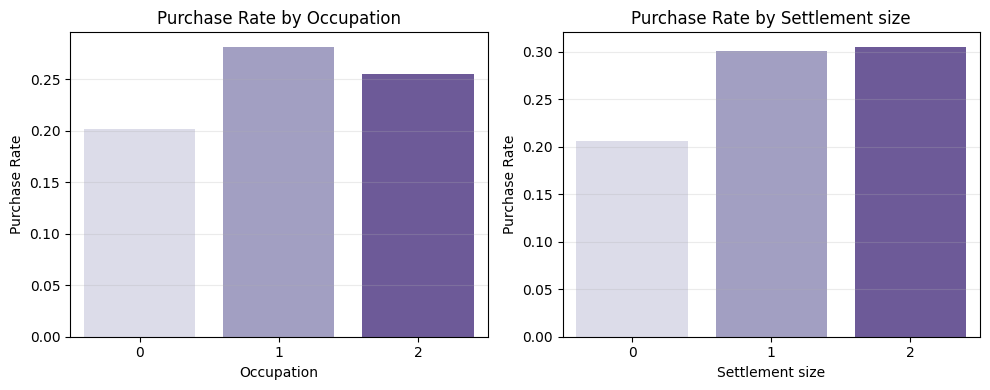

In [238]:
demographic_cols = ["Sex","Marital status","Education","Occupation","Settlement size"]


fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, col in zip(axes, demographic_cols[:3]):
    pr = df.groupby(col)["Incidence"].mean()
    sns.barplot(x=pr.index.astype(str), y=pr.values, ax=ax, palette="Blues")
    ax.set_title(f"Purchase Rate by {col}")
    ax.set_xlabel(col); ax.set_ylabel("Purchase Rate"); ax.grid(axis="y", alpha=0.25)
plt.tight_layout(); plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10,4))
for ax, col in zip(axes, demographic_cols[3:]):
    pr = df.groupby(col)["Incidence"].mean()
    sns.barplot(x=pr.index.astype(str), y=pr.values, ax=ax, palette="Purples")
    ax.set_title(f"Purchase Rate by {col}")
    ax.set_xlabel(col); ax.set_ylabel("Purchase Rate"); ax.grid(axis="y", alpha=0.25)
plt.tight_layout(); plt.show()

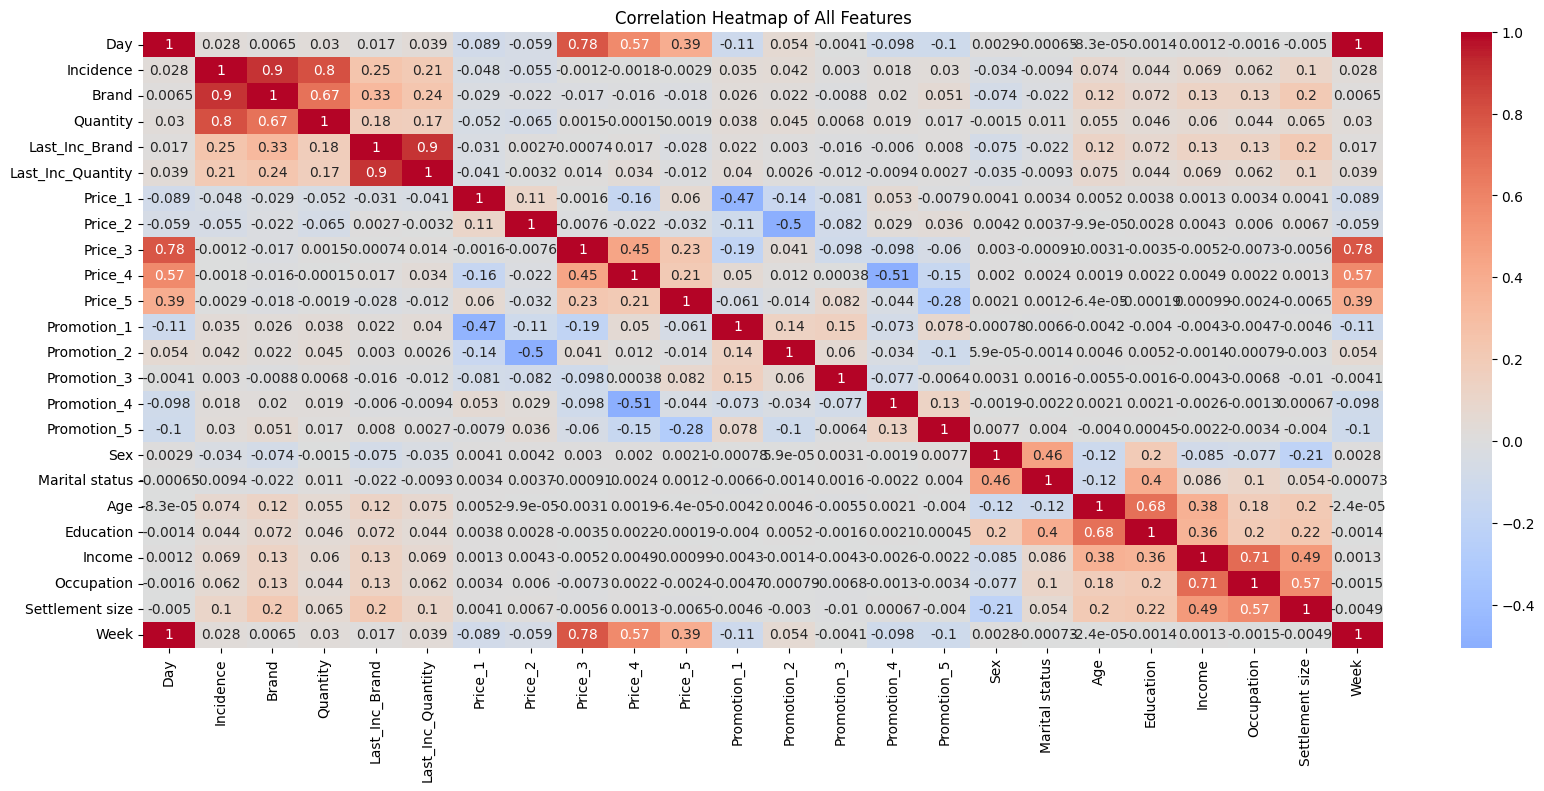

In [239]:
df_corr = df.copy().drop(columns=['ID'])

cat_cols = ['Brand','Incidence', 'Education', 'Occupation', 'Settlement size', 
            'Sex', 'Marital status', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4', 'Promotion_5']
for col in cat_cols:
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].astype('category').cat.codes


corr_matrix = df_corr.corr()


plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, cbar=True, center=0)
plt.title("Correlation Heatmap of All Features")
plt.show()

# **Purchase Data Insights Summary**

## **1. Purchase Incidence**
- **75.1%** of transactions had **no purchase** (Incidence=0).
- Only **24.9%** resulted in a purchase (Incidence=1).
- Suggests a large portion of interactions do not convert into sales.

---

## **2. Brand Market Share**
- **Brand 5** has the highest market share (34% of purchases).
- **Brand 3** has the lowest market share (5.8% of purchases).
- Indicates strong dominance by top 2 brands (Brands 5 & 2 = 65% combined share).

---

## **3. Brand Loyalty**
- Average **brand loyalty** is **76%**.
- **Brand 5** is the most loyal (86%), **Brand 1** the least (61%).
- Higher loyalty likely linked to higher purchase frequency.

---

## **4. Average Price per Brand**
| Brand | Avg. Price |
|-------|------------|
| 3     | 1.3966      |
| 2     | 1.3899      |
| 4     | 1.3895      |
| 5     | 1.3863      |
| 1     | 1.3418      |

- **Brand 3** is the most expensive.
- **Brand 1** is the cheapest.

---

## **5. Promotion Analysis**
- **66.1%** of purchases involved a promotion.
- Promotions **slightly increase purchase quantities** but not dramatically.
- Weekly promotion rates fluctuate but remain above 50%.

---

## **6. Quantity Analysis**
- Average quantity purchased: **2-4 units** per transaction.
- Promotions **increase quantity** marginally across most brands.

---

## **7. Brand Switching**
- **Brand 5** customers are least likely to switch.
- **Brand 1** customers switch brands most frequently.

---

## **8. Price Elasticity**
- **Own-Price Elasticity** (Price vs. Quantity for same brand):  
  - Brands 1, 2, 3, and 4 show **negative correlations** As **price increases, demand decreases**.  
  - **Brand 2 (-0.129)** is most price-sensitive.  
  - **Brand 5 (+0.016)** shows almost no sensitivity  Loyal customers pay regardless of price.

---

## **9. Demographics Influence**
- **Education**:  
  - Higher education  **Higher purchase rates**.
- **Occupation & Settlement Size**:  
  - **Urban (Settlement size=2)**  Higher purchase rates than rural areas.  
  - **High-skilled occupations**  More purchases.
- **Gender & Marital Status**:  
  - **Males (0)** purchase more frequently than Females.  
  - Marital status shows only a small effect.

---

### **10. Correlation Heatmap**
- **Strong Correlations**:  
  - Prices across brands show moderate correlations 
  - Income positively correlates with education & occupation
- **Weak Correlations**:  
  - Prices vs. promotions Almost no direct correlation.  
  - Incidence vs. demographic features  Low correlation.

---

In [240]:

import joblib
scaler_tr = joblib.load("scaler.pkl")
kmeans_tr = joblib.load("segmentation_model.pkl")

seg_features = ["Sex","Marital status","Age","Education","Income","Occupation","Settlement size"]


Xp = df[seg_features].apply(pd.to_numeric, errors="raise")
Xp_scaled = scaler_tr.transform(Xp)


df["Cluster"] = kmeans_tr.predict(Xp_scaled).astype(int)


print(df["Cluster"].value_counts().sort_index())

Cluster
0    12746
1    13010
2    21442
3    11495
Name: count, dtype: int64


In [241]:
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Week,Cluster
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,47,1,110866,1,0,1,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,47,1,110866,1,0,2,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,47,1,110866,1,0,2,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,47,1,110866,1,0,3,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,47,1,110866,1,0,3,2


C:\Users\FH\AppData\Local\Temp\ipykernel_8844\4122517336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary.index, y=cluster_summary["Total_Obs"], palette="Blues")


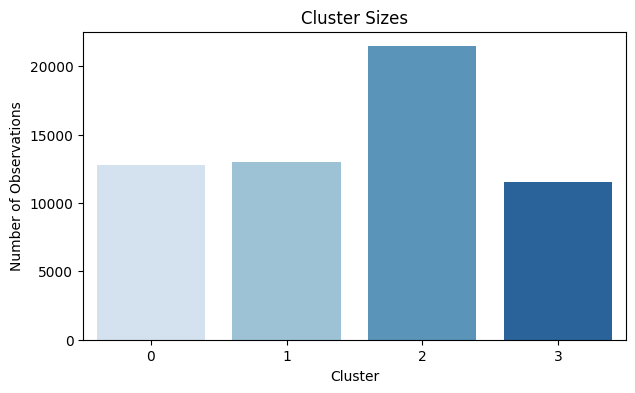

C:\Users\FH\AppData\Local\Temp\ipykernel_8844\4122517336.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_summary.index, y=cluster_summary["Purchase_Rate"], palette="viridis")


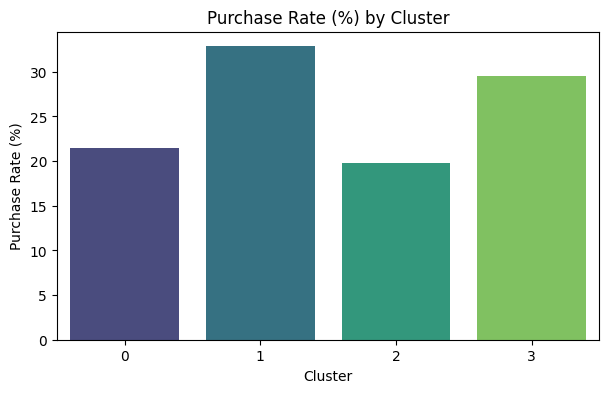

In [242]:
cluster_summary = df.groupby("Cluster").agg(
    Total_Obs = ("Cluster","size"),
    Purchases = ("Incidence","sum"),
    Purchase_Rate = ("Incidence","mean")
)
cluster_summary["Purchase_Rate"] = cluster_summary["Purchase_Rate"]*100


plt.figure(figsize=(7,4))
sns.barplot(x=cluster_summary.index, y=cluster_summary["Total_Obs"], palette="Blues")
plt.title("Cluster Sizes")
plt.xlabel("Cluster"); plt.ylabel("Number of Observations")
plt.show()


plt.figure(figsize=(7,4))
sns.barplot(x=cluster_summary.index, y=cluster_summary["Purchase_Rate"], palette="viridis")
plt.title("Purchase Rate (%) by Cluster")
plt.xlabel("Cluster"); plt.ylabel("Purchase Rate (%)")
plt.show()


C:\Users\FH\AppData\Local\Temp\ipykernel_8844\1519745196.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="Age", data=demo_means, palette="coolwarm")


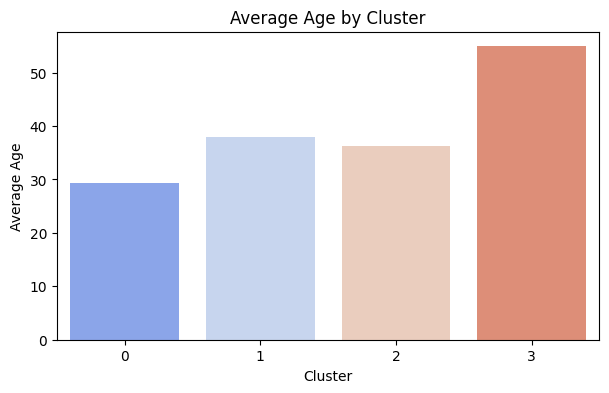

C:\Users\FH\AppData\Local\Temp\ipykernel_8844\1519745196.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="Income", data=demo_means, palette="magma")


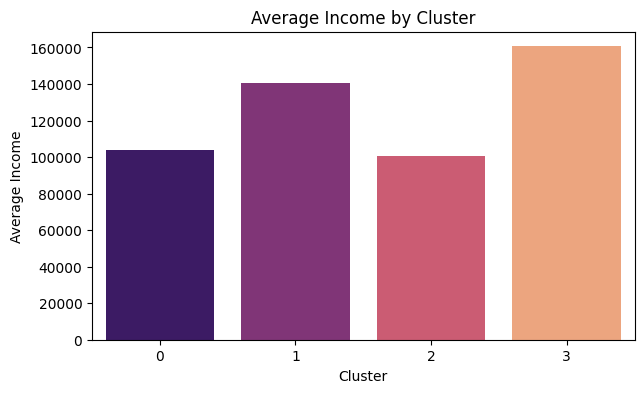

In [243]:

demo_means = df.groupby("Cluster")[["Age","Income"]].mean().round(1).reset_index()


plt.figure(figsize=(7,4))
sns.barplot(x="Cluster", y="Age", data=demo_means, palette="coolwarm")
plt.title("Average Age by Cluster")
plt.xlabel("Cluster"); plt.ylabel("Average Age")
plt.show()


plt.figure(figsize=(7,4))
sns.barplot(x="Cluster", y="Income", data=demo_means, palette="magma")
plt.title("Average Income by Cluster")
plt.xlabel("Cluster"); plt.ylabel("Average Income")
plt.show()


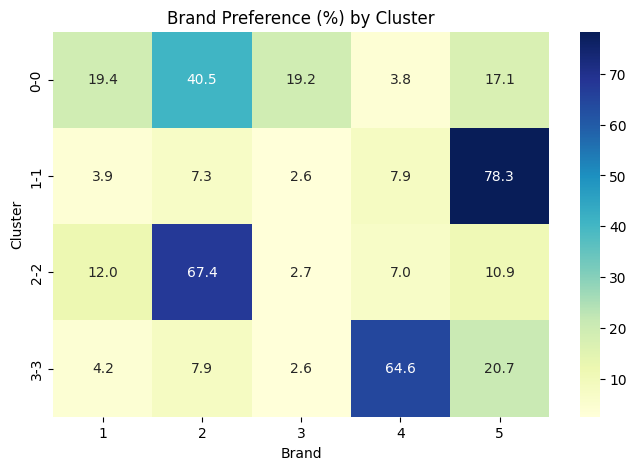

In [244]:
brand_pref = (
    df[df["Incidence"]==1]
    .groupby(["Cluster","Brand"])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100*x/x.sum())  
    .unstack(fill_value=0)
)

plt.figure(figsize=(8,5))
sns.heatmap(brand_pref, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Brand Preference (%) by Cluster")
plt.ylabel("Cluster"); plt.xlabel("Brand")
plt.show()
